In [1]:
# %reload_ext autoreload
# %autoreload 2

In [2]:
from matplotlib import pyplot as plt
from imageio import mimwrite
import numpy as np
from skimage import img_as_uint
from pathlib import Path
from deepom.bionano_compare import *
from deepom.bionano_utils import *


2023-01-19 13:08:09,576 - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


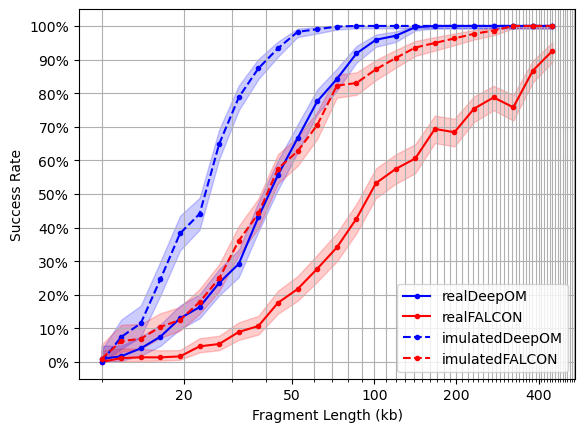

In [3]:

report = BionanoCompareReport()

report.plot_compare_init()
for report.run_name in ["20230118T234215Z", "20230118T152611Z"]:
    report.read_compute_results()
    if hasattr(report.aligner_items[0].crop_item.bnx_item, "simulated"):
        # plt.title("simulated images, real genome: " + report.run_name)
        report.ls = "--"
        report.label_prefix = "Simulated: "
    else:
        # plt.title("real images, real genome: " + report.run_name)
        report.ls = "-"
        report.label_prefix = "Real: "
        
    report.color = "b"
    report.plot_aligner_accuracy()
    report.color = "r"
    report.plot_aligner_falcon_accuracy()
    
    # plt.figure()
    # print(report.aligner_items[0].crop_item.bnx_item.simulated.image)
    # plt.figure()
    # plt.imshow(report.aligner_items[0].crop_item.bnx_item.bionano_image.segment_image[0])
    # plt.xlim(0, 100)

pyplot.legend()

2023-01-18 14:41:38,657 - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AttributeError: 'BionanoCompareReport' object has no attribute 'aligner_items_falcon'

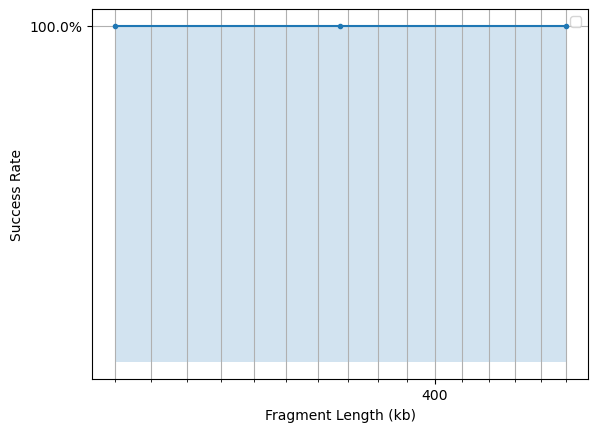

In [ ]:
from deepom.bionano_compare import *
from deepom.bionano_utils import *

report = BionanoCompareReport()
report.run_name = "20230118T143333Z"
report.read_compute_results()
report = report
plt.figure()
report.plot_compare_init()
report.plot_aligner_accuracy()
report.plot_aligner_falcon_accuracy()
pyplot.legend()
plt.figure()
# print(report.aligner_items[0].crop_item.bnx_item.simulated.image)
plt.imshow(report.aligner_items[0].crop_item.bnx_item.bionano_image.segment_image[0])
plt.xlim(0, 100)

In [8]:
for item in report.aligner_falcon_accuracy_items:
    if not item.correct:
        break
item.correct

False

In [9]:
item.alignment_item.qry_item.locs

array([7.47939348e-01, 9.33955860e+00, 1.21960859e+01, 1.68696918e+01,
       2.16430798e+01, 2.39077587e+01, 3.07639294e+01, 3.41488037e+01,
       3.75144424e+01, 3.84309616e+01, 3.97388000e+01, 4.48014259e+01,
       5.07905235e+01, 5.58808937e+01, 6.09428406e+01, 6.39852257e+01,
       6.62785263e+01, 7.25281143e+01, 7.74798355e+01, 8.17508926e+01,
       8.60901108e+01, 8.68591995e+01, 9.07822037e+01, 9.23760147e+01,
       9.51831131e+01, 9.73294983e+01, 1.05952309e+02, 1.09609398e+02,
       1.14898964e+02, 1.19823769e+02, 1.24072571e+02, 1.27692360e+02,
       1.32427963e+02, 1.39270187e+02, 1.43484360e+02, 1.46906586e+02,
       1.52485107e+02, 1.56257828e+02, 1.61512680e+02, 1.65121292e+02,
       1.70816177e+02, 1.75647751e+02, 1.77963425e+02, 1.82246994e+02,
       1.86420898e+02, 1.88337753e+02, 1.92111923e+02, 1.95676636e+02,
       1.99856613e+02, 2.04763367e+02, 2.07374435e+02, 2.12633728e+02,
       2.17362442e+02, 2.21572327e+02, 2.25265945e+02, 2.26286758e+02,
      

In [7]:
# item = report.aligner_falcon_accuracy_items[0]
# item.alignment_item.qry_item.inference_item.y

array([4.90458441, 4.58038425, 4.90106916, 4.87658644, 4.18031359,
       4.48093891, 4.87811661, 4.93801737, 4.63989258, 4.82952309,
       4.8121314 , 4.80400085, 4.73306513, 4.49522638, 4.62230444,
       4.66073656, 4.52168989, 4.77259016, 4.67047262, 4.70185328,
       4.62297153, 4.72649956, 4.19356823, 4.66736031, 4.70794296,
       4.16920948, 4.68768358, 4.72055483, 4.78625536, 4.6496377 ,
       4.72739553, 4.55616236, 4.63114786, 4.66180658, 4.47101116,
       4.60929394, 4.61172628, 4.55191946, 4.48042536, 1.32469618,
       4.57529926, 4.5703764 , 4.57569933, 4.46146345, 4.57818937,
       4.54145813, 4.54667568, 4.45497084, 4.52000141, 4.28566265,
       4.45366526, 4.16541815, 4.42566156, 4.23012733, 4.36783886,
       4.46965361, 4.35739088, 4.29046679, 4.3693428 , 4.36704016,
       4.22713184, 7.81936264, 7.9366951 , 8.03420925, 7.91326094,
       4.41935778, 7.64122725, 4.24451685, 4.46162176, 8.01115227,
       4.34290457, 7.88959694, 4.27420187, 7.81276846, 4.14816

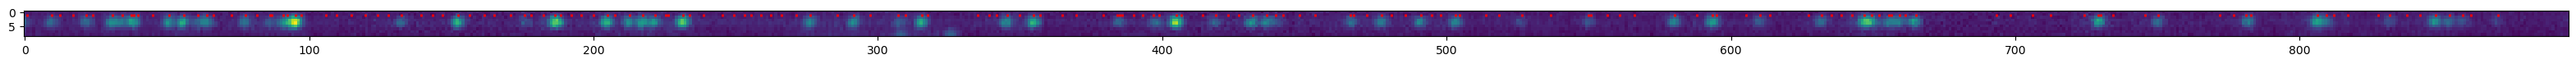

In [11]:
# plot bionano image
plt.figure(figsize=(40, 4))
plt.imshow(item.alignment_item.qry_item.inference_item.image_input)
plt.eventplot(item.alignment_item.qry_item.locs, linewidths=2, colors='r')
# plt.xlim(0, 100)



In [12]:
from deepom.falcon_compare import Falcon
from deepom.localizer import LocalizerModule, default_rng, Config
localizer_module = LocalizerModule(sparsity=2000, nominal_num_labels_fragment=32)
localizer_module.device = "cpu"
localizer_module.checkpoint_search_dir = Config.CHECKPOINT_SEARCH_DIR
localizer_module.load_checkpoint = True
localizer_module.init_ensure_module()

BasicUNet features: (32, 32, 64, 128, 256, 32).
loading checkpoint:  /home/ynogin/Dropbox/code/DeepOM/data/pretrained/checkpoint.pickle 




/home/ynogin/miniconda3/envs/deepom/lib/python3.10/site-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)


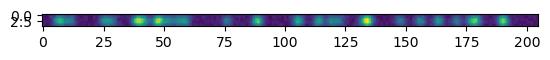

In [13]:
localizer_module.rng = default_rng(seed=4)

data_item = localizer_module.make_data()
data_item.lat_size_min = 9
data_item.stray_density = 1e-9
data_item.make_target()
inference_item = localizer_module.inference_item(data_item.image[:, 2:-2, :])
plt.imshow(inference_item.image_input)

(9, 205)

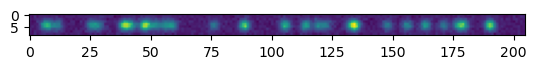

In [18]:
data_dir = Path.home() / "data"
image_file = data_dir / "image.tif"
image = data_item.image[0]
image = image - image.min()
image = img_as_uint(image)
mimwrite(image_file, image[None])
plt.imshow(image)
image.shape

In [15]:
falcon = Falcon()
falcon.start()

/home/ynogin/Dropbox/code/FALCON2D


In [24]:
locs = falcon(image_file)
len(locs.x)

FALCON GPU start...
frames no. 1 ~ 1 are reconstructing...


27

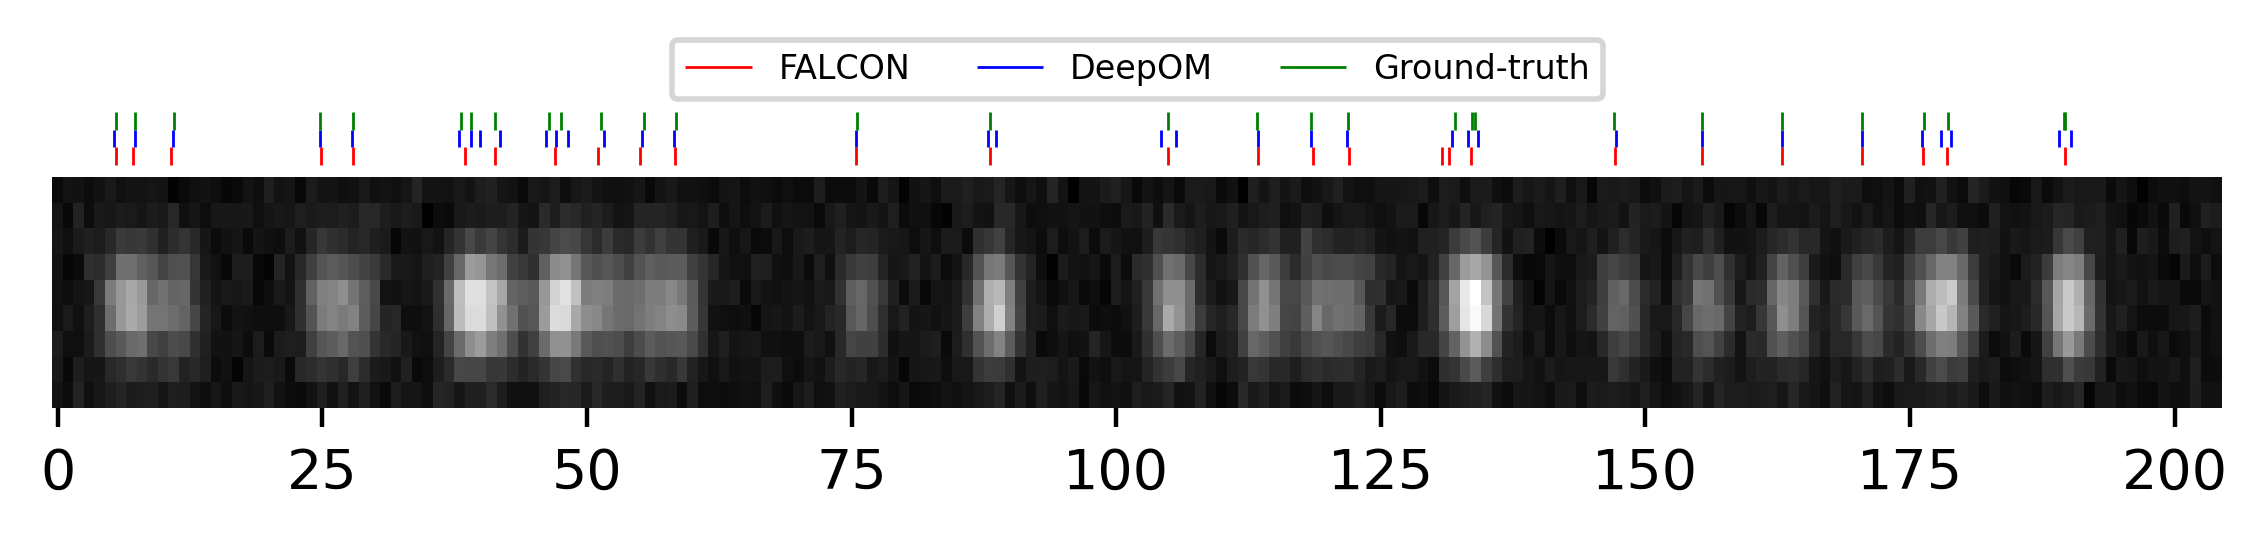

In [25]:
from imageio import mimread
fig, axs = plt.subplots(
    figsize=(7, 1),
    dpi=400,
    nrows=2,
    sharex=True,
    gridspec_kw=dict(height_ratios=[1, 3], hspace=0),
)

image = mimread(image_file)[0]
labeled_pos = data_item.labeled_coords.T[1]

ax = axs[0]
objs = ax.eventplot(
    [
        locs.x - 1,
        inference_item.loc_pred - .5,
        labeled_pos - .5,
    ],
    colors="rbg",
    linewidths=.5,
    linelengths=1
)
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = axs[1]
ax.imshow(image, cmap="gray", aspect="auto")
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
plt.sca(axs[0])
# plt.ylim(0, .5)
plt.legend(objs, 
           ["FALCON", 
            "DeepOM",
            "Ground-truth", 
            ],
              ncol=3, loc="upper center",
              fontsize=6,
              bbox_to_anchor=(0.5, 2)
              )
# set_formatter(lambda x, _: int((x * data_item.scale) / 1000))
# plt.gca().add_artist(
#     ScaleBar(scalebar_scale, color="w", box_alpha=0, scale_loc="top", location="upper right", width_fraction=.02,
#              sep=0))
# plt.xlabel("sequence position (kb)")
# plt.xlim(None, 100)